analyze the original IGUB dataset

-difference in difficulty in different questions?

-relationship between uncertainty/performance and learning choice?

In [1]:
import pandas as pd
#import matplotlib as plt
#plt=__import__("matplotlib.pyplot")
import matplotlib.pyplot as plt

import numpy as np
import scipy
import scipy.stats as stats
import random
mydata = pd.read_csv("IGUB_long_data.csv")
sdata = pd.read_csv('IGUB_short_data.csv')
sdata=sdata.assign(psy_T=(sdata['testing choice']=='tummy'))

analyze short version, difference between explanation and prediction conditions



sdata['psycho'].hist(by=sdata['condition2'])

pd.crosstab(sdata.psycho,sdata.condition2)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x11d3abe48>,
      dtype=object)

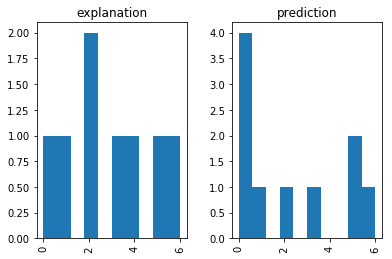

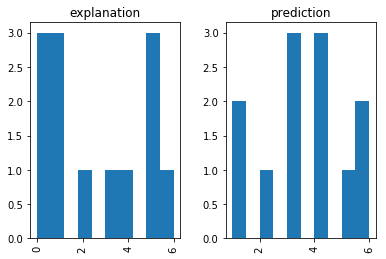

In [2]:
sdata[sdata.psy_T==1].psycho.hist(by=sdata['condition2'])
sdata[sdata.psy_T==0].psycho.hist(by=sdata['condition2'])

In [3]:
psy_ep=pd.DataFrame(pd.crosstab(sdata[sdata.psy_T==1].psycho,sdata[sdata.psy_T==1].condition2))
psy_ep=psy_ep.assign(uc=[0,0,1,1,1,2,2])
psy_all=pd.DataFrame(pd.crosstab(sdata.psycho,sdata.condition2))
psy_all=psy_all.assign(uc=[0,0,1,1,1,2,2])

psy_ep1=psy_ep.groupby('uc').agg('sum')/psy_all.groupby('uc').agg('sum')
psy_all

condition2,explanation,prediction,uc
psycho,,,
0,4,4,0
1,4,3,0
2,3,2,1
3,2,4,1
4,2,3,1
5,4,3,2
6,2,3,2


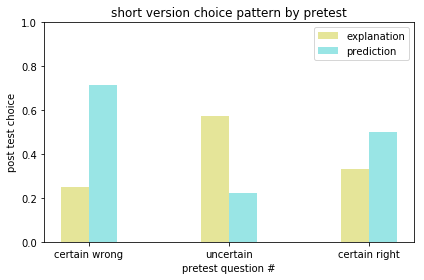

In [4]:
n_groups = 3

means_e = psy_ep1['explanation']
means_p = psy_ep1['prediction']

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}


rects1 = ax.bar(index, means_e, bar_width,
                alpha=opacity, color='y',
                label='explanation')
rects2 = ax.bar(index + bar_width, means_p, bar_width,
                alpha=opacity, color='c',
                label='prediction')

ax.set_xlabel('pretest question #')
ax.set_ylabel('post test choice')
ax.set_title('short version choice pattern by pretest')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('certain wrong','uncertain','certain right'))
ax.set_ylim([0, 1])
ax.legend()

fig.tight_layout()
plt.show()

In [5]:
sdata.groupby('condition2').describe()['psycho']

,count,mean,std,min,25%,50%,75%,max
condition2,,,,,,,,
explanation,21.0,2.666667,2.105548,0.0,1.0,2.0,5.00,6.0
prediction,22.0,2.909091,2.091003,0.0,1.0,3.0,4.75,6.0


In [6]:
#no difference between explanation and prediction
stats.chi2_contingency(pd.crosstab(sdata.psycho,sdata.condition2))

(1.5299525870954445, 0.9574801409155138, 6, array([[3.90697674, 4.09302326],
        [3.41860465, 3.58139535],
        [2.44186047, 2.55813953],
        [2.93023256, 3.06976744],
        [2.44186047, 2.55813953],
        [3.41860465, 3.58139535],
        [2.44186047, 2.55813953]]))

below is long version analysis

In [7]:
mydata.columns = mydata.columns.str.replace("-","_")
mydata=mydata.loc[0:58,:] 
#mydata.shape
mydata.ToM = (mydata.ToM=='table')
mydata.Germ=(mydata.Germ=='temp')
mydata.Psycho=(mydata.Psycho=='phone(tummy)')

In [8]:
ToM0=pd.DataFrame(pd.crosstab(mydata.ToM_ass_T,mydata.ToM))
ToM0=ToM0.assign(uc=[0,0,1,1,1,2,2])
mean_ToM0=ToM0.groupby('uc').agg('sum')[1]/(ToM0.groupby('uc').agg('sum')[1]+ToM0.groupby('uc').agg('sum')[0])

germ0=pd.DataFrame(pd.crosstab(mydata.Germ_ass_T,mydata.Germ))
germ0=germ0.assign(uc=[0,0,1,1,1,2,2])
mean_germ0=germ0.groupby('uc').agg('sum')[1]/(germ0.groupby('uc').agg('sum')[1]+germ0.groupby('uc').agg('sum')[0])

psy0=pd.DataFrame(pd.crosstab(mydata.Psych_ass_T,mydata.Psycho))
psy0=psy0.assign(uc=[0,0,1,1,1,2,2])
mean_psy0=psy0.groupby('uc').agg('sum')[1]/(psy0.groupby('uc').agg('sum')[1]+psy0.groupby('uc').agg('sum')[0])

mean_germ0

uc
0    0.636364
1    0.684211
2    0.689655
dtype: float64

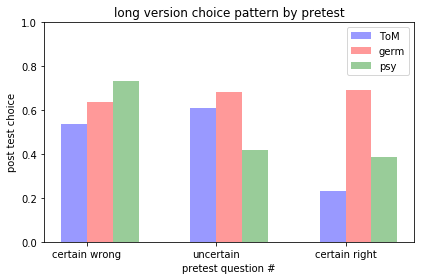

In [9]:
n_groups = 3

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}


rects1 = ax.bar(index, mean_ToM0, bar_width,
                alpha=opacity, color='b',
                label='ToM')
rects2 = ax.bar(index + bar_width, mean_germ0, bar_width,
                alpha=opacity, color='r',
                label='germ')
rects3 = ax.bar(index + bar_width*2, mean_psy0, bar_width,
                alpha=opacity, color='g',
                label='psy')

ax.set_xlabel('pretest question #')
ax.set_ylabel('post test choice')
ax.set_title('long version choice pattern by pretest')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('certain wrong','uncertain','certain right'))
ax.set_ylim([0, 1])
ax.legend()

fig.tight_layout()
plt.show()

checking if there are significant difference between items in pretest

In [10]:
stats.chi2_contingency(pd.crosstab(mydata.ToM_ass4, mydata.ToM_ass5))
stats.chi2_contingency(pd.crosstab(mydata.germ_Dana, mydata.germ_Riley))

(16.45413412851234,
 4.9841373483821086e-05,
 1,
 array([[ 5.79661017, 12.20338983],
        [13.20338983, 27.79661017]]))

In [11]:
mydata.loc[:,'germ_Chris':'psy_Blake']=1*(mydata.loc[:,'germ_Chris':'psy_Blake']=='y')

In [12]:
cordata=mydata.loc[:, 'ToM_ass1':'ToM_ass6']
cordata.corr()

,ToM_ass1,ToM_ass2,ToM_ass3,ToM_ass4,ToM_ass5,ToM_ass6
ToM_ass1,1.000000,0.610764,0.767105,0.502640,0.269025,0.118497
ToM_ass2,0.610764,1.000000,0.463079,0.791901,0.345105,0.257800
ToM_ass3,0.767105,0.463079,1.000000,0.426010,0.341835,0.044121
ToM_ass4,0.502640,0.791901,0.426010,1.000000,0.514053,0.161764
ToM_ass5,0.269025,0.345105,0.341835,0.514053,1.000000,0.106407
ToM_ass6,0.118497,0.257800,0.044121,0.161764,0.106407,1.000000


In [13]:
cordata=mydata.loc[:, 'germ_Chris':'germ_Andy']
cordata.corr()
from scipy.stats import pearsonr
pearsonr(mydata.loc[:, 'ToM_ass3'],mydata.loc[:, 'ToM_ass5'])

(0.3418346648734762, 0.008052862741674403)

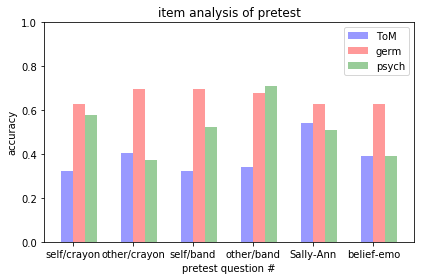

In [14]:
n_groups = 6

means_ToM = mydata.loc[:,'ToM_ass1':'ToM_ass6'].mean(0)
    #se_ToM = mydata.loc[:,'ToM_ass1':'ToM_ass6'].std(0)/np.sqrt(59)
means_germ = mydata.loc[:,'germ_Chris':'germ_Andy'].mean(0)
means_psy = mydata.loc[:,'psy_Charlie':'psy_Blake'].mean(0)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_ToM, bar_width,
                alpha=opacity, color='b',
                #yerr=se_ToM, error_kw=error_config,
                label='ToM')
rects2 = ax.bar(index + bar_width, means_germ, bar_width,
                alpha=opacity, color='r',
                label='germ')
rects2 = ax.bar(index + bar_width*2, means_psy, bar_width,
                alpha=opacity, color='g',
                label='psych')

ax.set_xlabel('pretest question #')
ax.set_ylabel('accuracy')
ax.set_title('item analysis of pretest')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('self/crayon', 'other/crayon', 'self/band', 'other/band', 'Sally-Ann','belief-emo'))
ax.set_ylim([0, 1])
ax.legend()

fig.tight_layout()
plt.show()

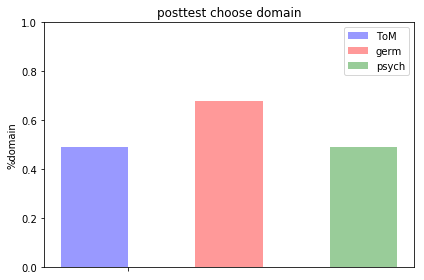

In [15]:
n_groups = 1

means_ToM1 = mydata.ToM.mean(0)
means_germ1 = mydata.Germ.mean(0)
means_psy1 = mydata.Psycho.mean(0)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_ToM1, bar_width,
                alpha=opacity, color='b',
                #yerr=se_ToM, error_kw=error_config,
                label='ToM')
rects2 = ax.bar(index + bar_width*2, means_germ1, bar_width,
                alpha=opacity, color='r',
                label='germ')
rects2 = ax.bar(index + bar_width*4, means_psy1, bar_width,
                alpha=opacity, color='g',
                label='psych')

ax.set_xlabel('')
ax.set_ylabel('%domain')
ax.set_title('posttest choose domain')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels('')
ax.set_ylim([0, 1])
ax.legend()

fig.tight_layout()
plt.show()

The above two graphs showed that:
1)children find the pre-test germ questions easier than psy, both easier than ToM
2)children were more likely to choose in-domain follow-up in germ compared to the rest

Does this mean better performance lead to more information seeking??? (skip below to see additional analysis)

Checking distribution of answers based on all pre-test items.
It appears that the distribution is super un-even across different domains.

In [16]:
means_ToM2 = mydata.loc[:,'ToM_ass1':'ToM_ass6'].mean(1)
means_germ2 = mydata.loc[:,'germ_Chris':'germ_Andy'].mean(1)
means_psy2 = mydata.loc[:,'psy_Charlie':'psy_Blake'].mean(1)
#pd.crosstab(means_ToM2,means_germ2)

(array([21., 25., 13.]),
 array([0.  , 0.34, 0.83, 1.  ]),
 <a list of 3 Patch objects>)

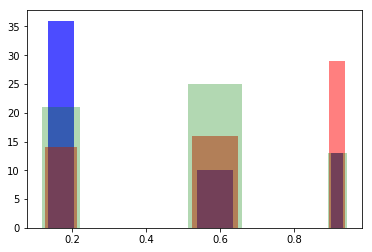

In [30]:
plt.hist(means_ToM2, bins=[0,0.34,0.83,1],color='b',alpha=0.7, rwidth = 0.2)
plt.hist(means_germ2, bins=[0,0.34,0.83,1],color='r',alpha=0.5, rwidth = 0.25)
plt.hist(means_psy2, bins=[0,0.34,0.83,1],color='g',alpha=0.3, rwidth = 0.3)

What about only analyzing the highest performing questions? Maybe there's something weird going on with the ToM questions...?
Distribution slightly more even?

In [18]:
means_ToM3 = mydata.loc[:,'ToM_ass5':'ToM_ass6'].mean(1)
means_germ3 = mydata.loc[:,'germ_Jordan':'germ_Andy'].mean(1)
means_psy3 = mydata.loc[:,'psy_Ari':'psy_Blake'].mean(1)

(array([22., 21., 16.]),
 array([0.  , 0.25, 0.8 , 1.  ]),
 <a list of 3 Patch objects>)

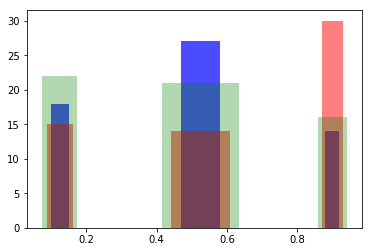

In [19]:
plt.hist(means_ToM3, bins=[0,0.25,0.8,1],color='b',alpha=0.7, rwidth = 0.2)
plt.hist(means_germ3, bins=[0,0.25,0.8,1],color='r',alpha=0.5, rwidth = 0.3)
plt.hist(means_psy3, bins=[0,0.25,0.8,1],color='g',alpha=0.3, rwidth = 0.4)

Based on only the higher-performing ToM items and corresponding germ and psy items, re-analyzed performance pattern for post-test

plotting "what percentage of kids in each performance group in each domain selected the domain-relevant option"

In [20]:
mydata=mydata.assign(ToM3=means_ToM3,germ3=means_germ3,psy3=means_psy3)
df = mydata.loc[:,('ToM','ToM3','Germ','germ3','Psycho','psy3')]
means_ToM4=pd.DataFrame(pd.crosstab(mydata.ToM,mydata.ToM3)/mydata.groupby('ToM3').size()).iloc[1]
means_germ4=pd.DataFrame(pd.crosstab(mydata.Germ,mydata.germ3)/mydata.groupby('germ3').size()).iloc[1]
means_psy4=pd.DataFrame(pd.crosstab(mydata.Psycho,mydata.psy3)/mydata.groupby('psy3').size()).iloc[1]

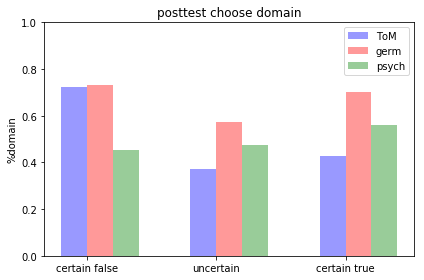

In [21]:
n_groups = 3

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_ToM4, bar_width,
                alpha=opacity, color='b',
                label='ToM')
rects2 = ax.bar(index + bar_width, means_germ4, bar_width,
                alpha=opacity, color='r',
                label='germ')
rects2 = ax.bar(index + bar_width*2, means_psy4, bar_width,
                alpha=opacity, color='g',
                label='psych')

ax.set_xlabel('')
ax.set_ylabel('%domain')
ax.set_title('posttest choose domain')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('certain false','uncertain','certain true'))
ax.set_ylim([0, 1])
ax.legend()

fig.tight_layout()
plt.show()

plotting "what percentage of kids choosing the domain-relevant option came from each pre-test group, for each domain"

mydata=mydata.assign(ToM3=means_ToM3,germ3=means_germ3,psy3=means_psy3)
df = mydata.loc[:,('ToM','ToM3','Germ','germ3','Psycho','psy3')]
means_ToM5=pd.DataFrame(pd.crosstab(mydata.ToM,mydata.ToM3).T/mydata.groupby('ToM').size())[1]
means_germ5=pd.DataFrame(pd.crosstab(mydata.Germ,mydata.germ3).T/mydata.groupby('Germ').size())[1]
means_psy5=pd.DataFrame(pd.crosstab(mydata.Psycho,mydata.psy3).T/mydata.groupby('Psycho').size())[1]
mydata.groupby('ToM').size()

n_groups = 3

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.2

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_ToM5, bar_width,
                alpha=opacity, color='b',
                label='ToM')
rects2 = ax.bar(index + bar_width, means_germ5, bar_width,
                alpha=opacity, color='r',
                label='germ')
rects2 = ax.bar(index + bar_width*2, means_psy5, bar_width,
                alpha=opacity, color='g',
                label='psych')

ax.set_xlabel('')
ax.set_ylabel('%domain')
ax.set_title('posttest choose domain')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('certain false','uncertain','certain true'))
ax.set_ylim([0, 1])
ax.legend()

fig.tight_layout()
plt.show()